In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log. 

In [2]:
# Заменяю 0 и 1 на максимально близкое к этим значениям число с плавающей запятой

def calc_logloss(y, y_pred):
    
    y_pred = y_pred.astype(float)
    
    for i in range(y_pred.shape[0]):
        if y_pred[i] <= 0:
            y_pred[i] = 0.0000000000000001
        elif y_pred[i] >= 1:
            y_pred[i] = 0.9999999999999999
                
    return - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))

In [4]:
# Результат:

y = np.array([1, 0])

y_pred1 = np.array([0, 1])
y_pred2 = np.array([1, 0])

calc_logloss(y, y_pred1), calc_logloss(y, y_pred2)

(36.78908102879092, 1.1102230246251565e-16)

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [6]:
# Создаем датасет

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [8]:
# Стандартизируем выбоку

def calc_std_feat(x):
    x[1:] = ((x[1:].T - x[1:].mean(axis=1)) / x[1:].std(axis=1)).T
    return x

standart_X = calc_std_feat(X)
standart_X

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [9]:
# Обучаем модель

def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [10]:
def eval_model(X, y, iterations, alpha=1e-4):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    ww = []
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        
        errors.append(err)
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    
    errors = np.array(errors)
    
    return errors, W

In [11]:
model = eval_model(
    X=standart_X,
    y=y,
    iterations=6000,
    alpha=1e-2
)

model[0][-2:]

600 [ 0.17824997 -0.97116504 -0.02607988  1.46430415] 0.48985240629168086
1200 [ 0.07395856 -1.2388272  -0.16312474  1.82897532] 0.4501286648107995
1800 [ 0.06035202 -1.44495132 -0.26615902  2.15742805] 0.4231799335005643
2400 [ 0.07238336 -1.61978426 -0.35850137  2.44522282] 0.4027979097629191
3000 [ 0.09256249 -1.77093167 -0.44329208  2.70101059] 0.3867969488907016
3600 [ 0.11572302 -1.9033832  -0.52226196  2.93131324] 0.3738895997943118
4200 [ 0.14010956 -2.02077465 -0.59658742  3.14097152] 0.3632368317911221
4800 [ 0.16501519 -2.1258425  -0.66710883  3.33365632] 0.35426975061363336
5400 [ 0.19010154 -2.22069471 -0.73444655  3.51220301] 0.34659142894762324
6000 [ 0.21518233 -2.30698587 -0.79907034  3.67883617] 0.3399180274364685


array([0.33992844, 0.33991803])

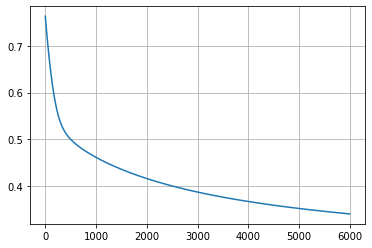

In [12]:
plt.plot(range(model[0].shape[0]),model[0])

plt.grid()
plt.show()


**Результат:** log_loss минимален при alpha = 1e-2 и количестве итераций = 6000

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [13]:
def cals_pred_proba(W, X):
    
    y_pred_proba = 1 / (1 + np.exp(-np.dot(W, X)))
    
    return y_pred_proba

In [15]:
cals_pred_proba(model[1], standart_X)

array([0.27270017, 0.21239491, 0.92367771, 0.24126481, 0.62619604,
       0.34267011, 0.97057249, 0.19036803, 0.28934445, 0.88908401])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [16]:
def y_pred(W, X):
    
    y_pred = cals_pred_proba(W, X)

    for i in range(y_pred.shape[0]):
        if y_pred[i] > 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    
    return y_pred

In [20]:
cp = y_pred(model[1], standart_X)
cp

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

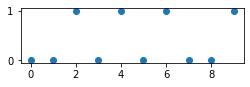

In [21]:
plt.figure(figsize=(4,1))
plt.scatter(range(cp.shape[0]), cp)
plt.show()

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [22]:
def accuracy(y, y_pred):
    
    acc = (y_pred == y).sum()/cp.shape[0]
    
    return acc

In [23]:
# Accuracy
accuracy(y=y, y_pred=cp)

0.9

In [25]:

def error_matrix(y, y_pred):
    
    TP = y * y_pred
    FP = y_pred - TP
    FN = y - TP
    TN = y**0 - TP - FP - FN
    
    return np.array([[TP.sum(), FP.sum()], 
                     [FN.sum(), TN.sum()]])

In [32]:
# матрица ошибок
em = error_matrix(y=y, y_pred=cp)
em

array([[4., 0.],
       [1., 5.]])

In [35]:
# точность
def precision(em):
    return em[0,0]/(em[0,0]+em[0,1])

precision(em)

1.0

In [36]:
# полнота
def recall(em):
    return em[0,0]/(em[0,0]+em[1,0])

recall(em)

0.8

In [37]:
# F1 score
def F1_score(em):
    pre = precision(em)
    rec = recall(em)
    return (2*pre*rec)/(pre+rec)

F1_score(em)

0.888888888888889

6. Могла ли модель переобучиться? Почему?

**Ответ:** 

Да, могла, потому что:
*   в исходной матрице малое количество объектов
*   не были использовани $L_1$ или $L_2$ регуляции
